IoU: 0.81
IoU Score for Image 1: 0.0
Labeled Image 1 processed and saved as labeled_output_image_1.png
Labeled Image 2 processed and saved as labeled_output_image_2.png
Labeled Image 3 processed and saved as labeled_output_image_3.png
Labeled Image 4 processed and saved as labeled_output_image_4.png
Labeled Image 5 processed and saved as labeled_output_image_5.png


c:\Users\garri\OneDrive\Desktop\PIL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0483
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step - loss: 0.0951
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 0.1600
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 0.1570
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - loss: 0.1095
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 0.0821
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 0.0211
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - loss: 0.0295
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.0201
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.0074


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


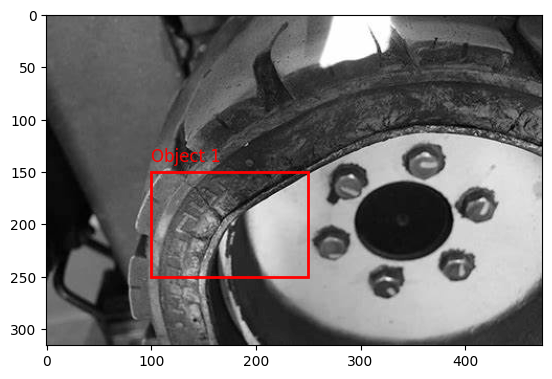

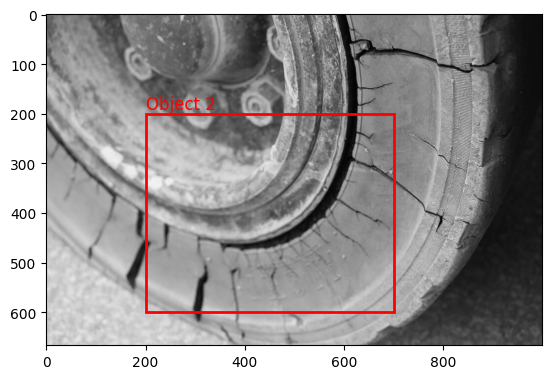

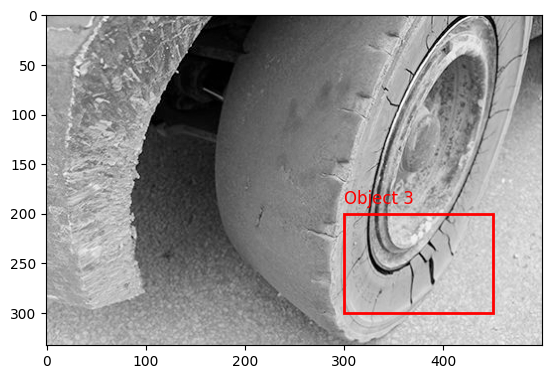

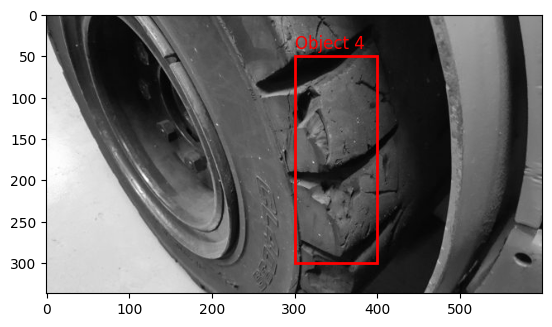

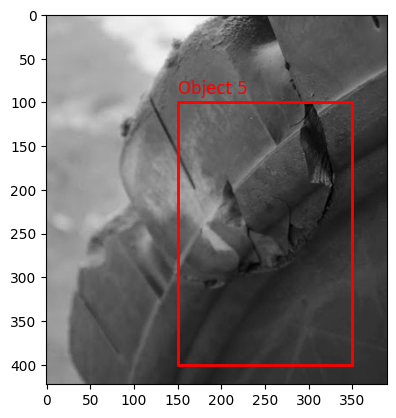

In [ ]:
from PIL import Image # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.patches as patches # type: ignore
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential,  models, layers  # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator








# Step 1: Load 5 images from file paths
image_paths = [
    "images/bentRim.jpg",
    "images/radialCracking.jpg",
    "images/cracking.jpg",
    "images/damagedTire.jpg",
    "images/rip.jpg",

    
    
    
]

# Load the images and convert them to NumPy arrays (grayscale for simplicity)
images = [np.array(Image.open(path).convert('L')) for path in image_paths]

# Step 2: Define the ground truth bounding boxes (xmin, ymin, xmax, ymax)
bounding_boxes = [
    np.array([100, 150, 250, 250]),   
    np.array([200, 200, 700, 600]),  
    np.array([300, 200, 450, 300]),  
    np.array([300, 50, 400, 300]),
    np.array([150, 100, 350, 400]),  
    

]

# Step 3: Visualize and save the images with bounding boxes
for i, (image, box) in enumerate(zip(images, bounding_boxes)):
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle(
        (box[0], box[1]),  # (xmin, ymin)
        box[2] - box[0],   # width
        box[3] - box[1],   # height
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')

    # Save the image with bounding box
    plt.savefig(f"image_with_box_{i + 1}.png", bbox_inches='tight')
    plt.close()  # Close the figure to avoid displaying it
# Example predicted bounding box from your model 
predicted_box = [60, 60, 90, 90]  # (x, y, width, height)

# Manually defined ground truth bounding box
ground_truth_box = [50, 50, 100, 100]  # (x, y, width, height)

# Function to calculate IoU
def calculate_iou(box1, box2):
    x1_min, y1_min, w1, h1 = box1
    x2_min, y2_min, w2, h2 = box2

    x1_max, y1_max = x1_min + w1, y1_min + h1
    x2_max, y2_max = x2_min + w2, y2_min + h2

    xi1 = max(x1_min, x2_min)
    yi1 = max(y1_min, y2_min)
    xi2 = min(x1_max, x2_max)
    yi2 = min(y1_max, y2_max)
    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    inter_area = inter_width * inter_height

    box1_area = w1 * h1
    box2_area = w2 * h2

    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# Calculate IoU between predicted and ground truth boxes
iou_value = calculate_iou(predicted_box, ground_truth_box)
print(f"IoU: {iou_value}") 


def iou(box1, box2): 
    # Calculate the (x, y) coordinates of the intersection rectangle
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    # Calculate the area of intersection
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # Calculate the area of both bounding boxes
    box1Area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2Area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    # Calculate IoU
    iou = interArea / float(box1Area + box2Area - interArea)
    return iou

# Example usage with your bounding box and a ground truth box
iou_score = iou(bounding_boxes[0], ground_truth_box) # type: ignore
print(f"IoU Score for Image 1: {iou_score}") 



for i, image in enumerate(images): 
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    # Draw the bounding box
    box = bounding_boxes[i]
    rect = patches.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1],
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

    # Add a label
    ax.text(box[0], box[1] - 10, f"Object {i+1}", color='red', fontsize=12)

    # Save the image with bounding boxes and labels
    output_filename = f"labeled_output_image_{i+1}.png"
    plt.savefig(output_filename)
    print(f"Labeled Image {i+1} processed and saved as {output_filename}")
# Load and preprocess your images
def load_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)  # Resize to match the input shape of the model
        img = img / 255.0  # Normalize to 0-1 range
        images.append(img)
    return np.array(images)

# Create a simple CNN for object detection
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(4, activation='sigmoid')  # Output bounding box coordinates
    ])
    return model

# Compile the model
def compile_model(model):
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Prepare your dataset (image paths and bounding boxes)
image_paths = ['image_with_box_1.png', 'image_with_box_2.png', 'image_with_box_3.png',"image_with_box_4.png" ,'image_with_box_5.png']
bounding_boxes = [
    [0.1, 0.2, 0.4, 0.4],  # Normalized (x, y, width, height) for each image
    [0.3, 0.3, 0.5, 0.5],
    [0.4, 0.4, 0.6, 0.6],
    [0.2, 0.1, 0.3, 0.3],
    [0.3, 0.3, 0.7, 0.7],
]

# Convert bounding boxes to numpy array
bounding_boxes = np.array(bounding_boxes)

# Load and preprocess the images
images = load_images(image_paths)

# Build and compile the model
model = build_model()
model = compile_model(model)

# Train the model (keeping it simple for 10 epochs)
model.fit(images, bounding_boxes, epochs=10)

# After training, you can save the model and use it for inference
model.save('object_detection_model.h5')

# To use the trained model for inference
def predict_bounding_box(image_path, model):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    prediction = model.predict(img_resized)
    
    # Convert the normalized bounding box back to original image coordinates
    height, width, _ = img.shape
    x, y, w, h = prediction[0]
    x = int(x * width)
    y = int(y * height)
    w = int(w * width)
    h = int(h * height)
    
    # Draw the bounding box on the image
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('Detected Object', img)
    cv2.waitKey(0)

# Example usage of inference
predict_bounding_box('image1.jpg', model) 